# TEST 10 - photosphere tables
We compute the 0.60Msun models with the photosphere tables for different metallicities to check if the weird behaviour is still the same


In [1]:
import mesa_reader as mr
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  

In [2]:
%matplotlib ipympl

## using photosphere tables

In [3]:
# Define the parameters
masses = [0.6]
alphas = [1.82]
metallicities = [0.0045, 0.0142, 0.028]


# Base path template
base_path = 'test_grid_photosphere/results/mass{mass}_alpha{alpha}_z{z}/history.data'

# Create a list to store the MesaData instances and their associated alpha values
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance to the list
                mesa_data_list.append((mesa_data_instance, mass, z, alpha))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")


## 0.60 $M_\odot$

In [4]:
# Iterate over mesa_data_list to find the specific model

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:  
        photosphere_mass060_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        photosphere_mass060_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.028 and mesa_data[3] == 1.82:
        photosphere_mass060_z028_alpha182 = mesa_data[0]
        break

## using tau_100 tables

In [5]:
# Define the parameters
masses = [0.6]
alphas = [1.82]
metallicities = [0.0045, 0.0142, 0.028]


# Base path template
base_path = 'test2_grid_deuterium_tau100/results/mass{mass}_alpha{alpha}_z{z}/history.data'

# Create a list to store the MesaData instances and their associated alpha values
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance to the list
                mesa_data_list.append((mesa_data_instance, mass, z, alpha))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")


In [6]:
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:  
        tau100_mass060_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        tau100_mass060_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.028 and mesa_data[3] == 1.82:
        tau100_mass060_z028_alpha182 = mesa_data[0]
        break

## MIST data

In [7]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

In [8]:
download('https://github.com/jieunchoi/MIST_codes/raw/master/scripts/' +
         'read_mist_models.py')

In [9]:
import read_mist_models

# Read MIST models

eep060_feh_p000 = read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00060M.track.eep')
eep060_feh_p025 = read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00060M.track.eep')
eep060_feh_m050 = read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00060M.track.eep')

Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00060M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00060M.track.eep
Reading in: MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00060M.track.eep


## Metallicity influence comparing with MIST models

We need to just store the MIST tracks up to the age of the Universe (as we do)

In [10]:
# Define the target age (in years)
target_age = 13.7 * 10**9

# Define the MIST models and their corresponding parameters
models = {
    (0.00, 0.60): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00060M.track.eep'),
    (0.25, 0.60): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00060M.track.eep'),
    (-0.5, 0.60): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00060M.track.eep')
}

# Create dictionaries to store the Teff and logg values up to the target age for each combination of metallicity and mass
teff_values_up_to_target_age = {(z, mass): [] for z, mass in models.keys()}
logg_values_up_to_target_age = {(z, mass): [] for z, mass in models.keys()}

# Iterate over the models
for (z, mass), eep_model in models.items():
    # Extract the age, Teff, and logg arrays
    age = np.array(eep_model.eeps['star_age'])
    teff = 10**np.array(eep_model.eeps['log_Teff'])  # Convert log_Teff to Teff
    logg = np.array(eep_model.eeps['log_g'])
    
    # Find indices where age is less than or equal to the target age
    valid_indices = np.where(age <= target_age)[0]
    
    if valid_indices.size > 0:
        # Store the Teff and logg values up to the target age
        teff_values_up_to_target_age[(z, mass)].extend(teff[valid_indices])
        logg_values_up_to_target_age[(z, mass)].extend(logg[valid_indices])
    else:
        print(f"No data available up to target age {target_age} years for z={z}, mass={mass}.")


Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00060M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00060M.track.eep
Reading in: MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00060M.track.eep


In [11]:
# Access the Teff values up to the target age and store them in lists

teff_at_target_age_mass060_z000 = teff_values_up_to_target_age.get((0.00, 0.60), [])
teff_at_target_age_mass060_z025 = teff_values_up_to_target_age.get((0.25, 0.60), [])
teff_at_target_age_mass060_zm050 = teff_values_up_to_target_age.get((-0.5, 0.60), [])

# Access the logg values up to the target age and store them in lists

logg_at_target_age_mass060_z000 = logg_values_up_to_target_age.get((0.00, 0.60), [])
logg_at_target_age_mass060_z025 = logg_values_up_to_target_age.get((0.25, 0.60), [])
logg_at_target_age_mass060_zm050 = logg_values_up_to_target_age.get((-0.5, 0.60), [])

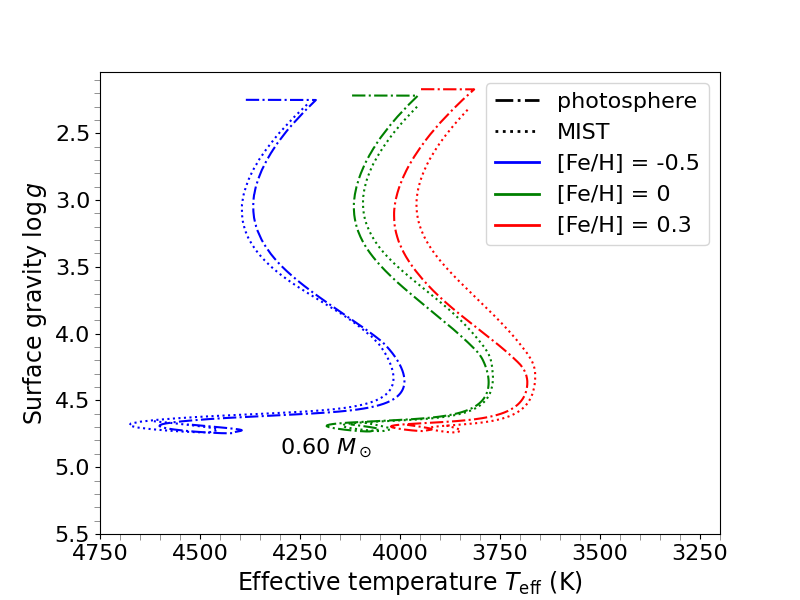

In [12]:
plt.figure(figsize=(8, 6))


plt.annotate(r'0.60 $M_\odot$', (4300, 4.9), fontsize=16)

plt.plot(photosphere_mass060_z0045_alpha182.Teff, photosphere_mass060_z0045_alpha182.log_g, color='blue', linestyle='-.')
plt.plot(photosphere_mass060_z0142_alpha182.Teff, photosphere_mass060_z0142_alpha182.log_g, color='green', linestyle='-.')
plt.plot(photosphere_mass060_z028_alpha182.Teff, photosphere_mass060_z028_alpha182.log_g, color='red', linestyle='-.')

plt.plot(teff_at_target_age_mass060_zm050, logg_at_target_age_mass060_zm050, color='blue', ls=':')
plt.plot(teff_at_target_age_mass060_z000, logg_at_target_age_mass060_z000, color='green', ls=':')
plt.plot(teff_at_target_age_mass060_z025, logg_at_target_age_mass060_z025, color='red', ls=':')

# Set axis labels
plt.xlabel(r'Effective temperature $T_{\text{eff}}$ (K)', fontsize=17)
plt.ylabel(r'Surface gravity $\log g$', fontsize=17)

# plt.title(r'fixed $\alpha_\text{MLT}$ = 1.82', fontsize=14)

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(4750, 3150, -250)
xminor_ticks = np.arange(4750, 3150, -50)
ymajor_ticks = np.arange(5.5, 2, -0.5)
yminor_ticks = np.arange(5.5, 2, -0.1)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', length=4, color='gray')

# Invert axes
ax.invert_xaxis()
ax.invert_yaxis()

# Enable grid for minor ticks
#ax.grid(which='both', linestyle='--', linewidth=0.5)
#ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

# Create a custom legend
legend_elements = [
    # Line2D([0], [0], color='black', ls='-', lw=2, label=r'tau_100'),
    Line2D([0], [0], color='black', ls='-.', lw=2, label=r'photosphere'),
    Line2D([0], [0], color='black', ls=':', lw=2, label=r'MIST'),
    Line2D([0], [0], color='blue', lw=2, label=r'[Fe/H] = -0.5'),
    Line2D([0], [0], color='green', lw=2, label=r'[Fe/H] = 0'),
    Line2D([0], [0], color='red', lw=2, label=r'[Fe/H] = 0.3'),

]
plt.legend(handles=legend_elements, fontsize=16, loc='best')

# Save figure
plt.savefig('photosphere-tables-comparison-MIST.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


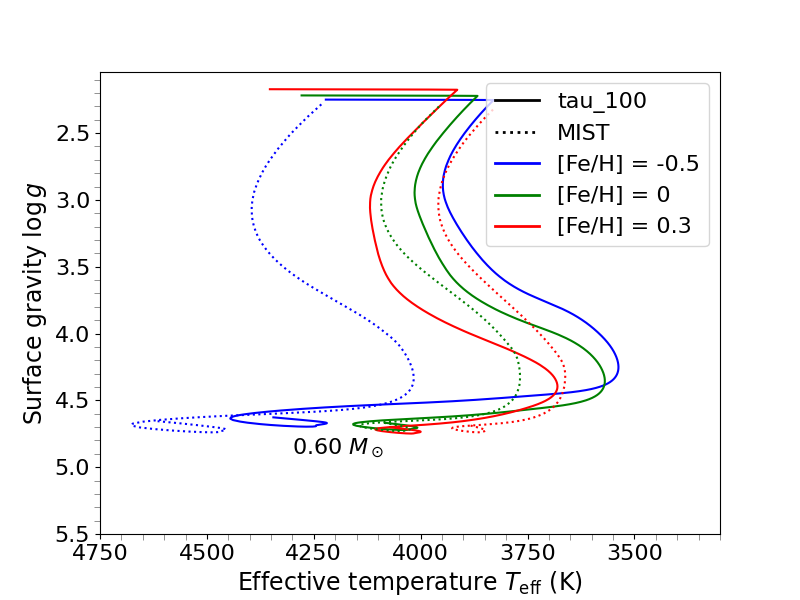

In [13]:
plt.figure(figsize=(8, 6))


plt.annotate(r'0.60 $M_\odot$', (4300, 4.9), fontsize=16)

plt.plot(tau100_mass060_z0045_alpha182.Teff, tau100_mass060_z0045_alpha182.log_g, color='blue', linestyle='-')
plt.plot(tau100_mass060_z0142_alpha182.Teff, tau100_mass060_z0142_alpha182.log_g, color='green', linestyle='-')
plt.plot(tau100_mass060_z028_alpha182.Teff, tau100_mass060_z028_alpha182.log_g, color='red', linestyle='-')

plt.plot(teff_at_target_age_mass060_zm050, logg_at_target_age_mass060_zm050, color='blue', ls=':')
plt.plot(teff_at_target_age_mass060_z000, logg_at_target_age_mass060_z000, color='green', ls=':')
plt.plot(teff_at_target_age_mass060_z025, logg_at_target_age_mass060_z025, color='red', ls=':')

# Set axis labels
plt.xlabel(r'Effective temperature $T_{\text{eff}}$ (K)', fontsize=17)
plt.ylabel(r'Surface gravity $\log g$', fontsize=17)

# plt.title(r'fixed $\alpha_\text{MLT}$ = 1.82', fontsize=14)

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(4750, 3250, -250)
xminor_ticks = np.arange(4750, 3250, -50)
ymajor_ticks = np.arange(5.5, 2, -0.5)
yminor_ticks = np.arange(5.5, 2, -0.1)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', length=4, color='gray')

# Invert axes
ax.invert_xaxis()
ax.invert_yaxis()

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='black', ls='-', lw=2, label=r'tau_100'),
    # Line2D([0], [0], color='black', ls='-.', lw=2, label=r'photosphere'),
    Line2D([0], [0], color='black', ls=':', lw=2, label=r'MIST'),
    Line2D([0], [0], color='blue', lw=2, label=r'[Fe/H] = -0.5'),
    Line2D([0], [0], color='green', lw=2, label=r'[Fe/H] = 0'),
    Line2D([0], [0], color='red', lw=2, label=r'[Fe/H] = 0.3'),

]
plt.legend(handles=legend_elements, fontsize=16, loc='upper right')

# Save figure
plt.savefig('tau100-tables-comparison-MIST.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()
